# EDA

In [ ]:
import pandas as pd

In [ ]:
# Loading the dataset (csv)
df = pd.read_csv('data/Crop_recommendation.csv')

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
# Checking for missing values

missing_values = df.isnull().sum()
print(missing_values)

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [ ]:
numerical_columns = df.columns[df.dtypes != 'object']
categorical_columns = df.columns[df.dtypes == 'object']

In [ ]:
print("Numerical Columns:")
print(numerical_columns)
print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

Categorical Columns:
Index(['label'], dtype='object')


In [ ]:
# Summary Statistics of Categorical Columns
df[categorical_columns].describe()

,label
count,2200
unique,22
top,rice
freq,100


In [ ]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

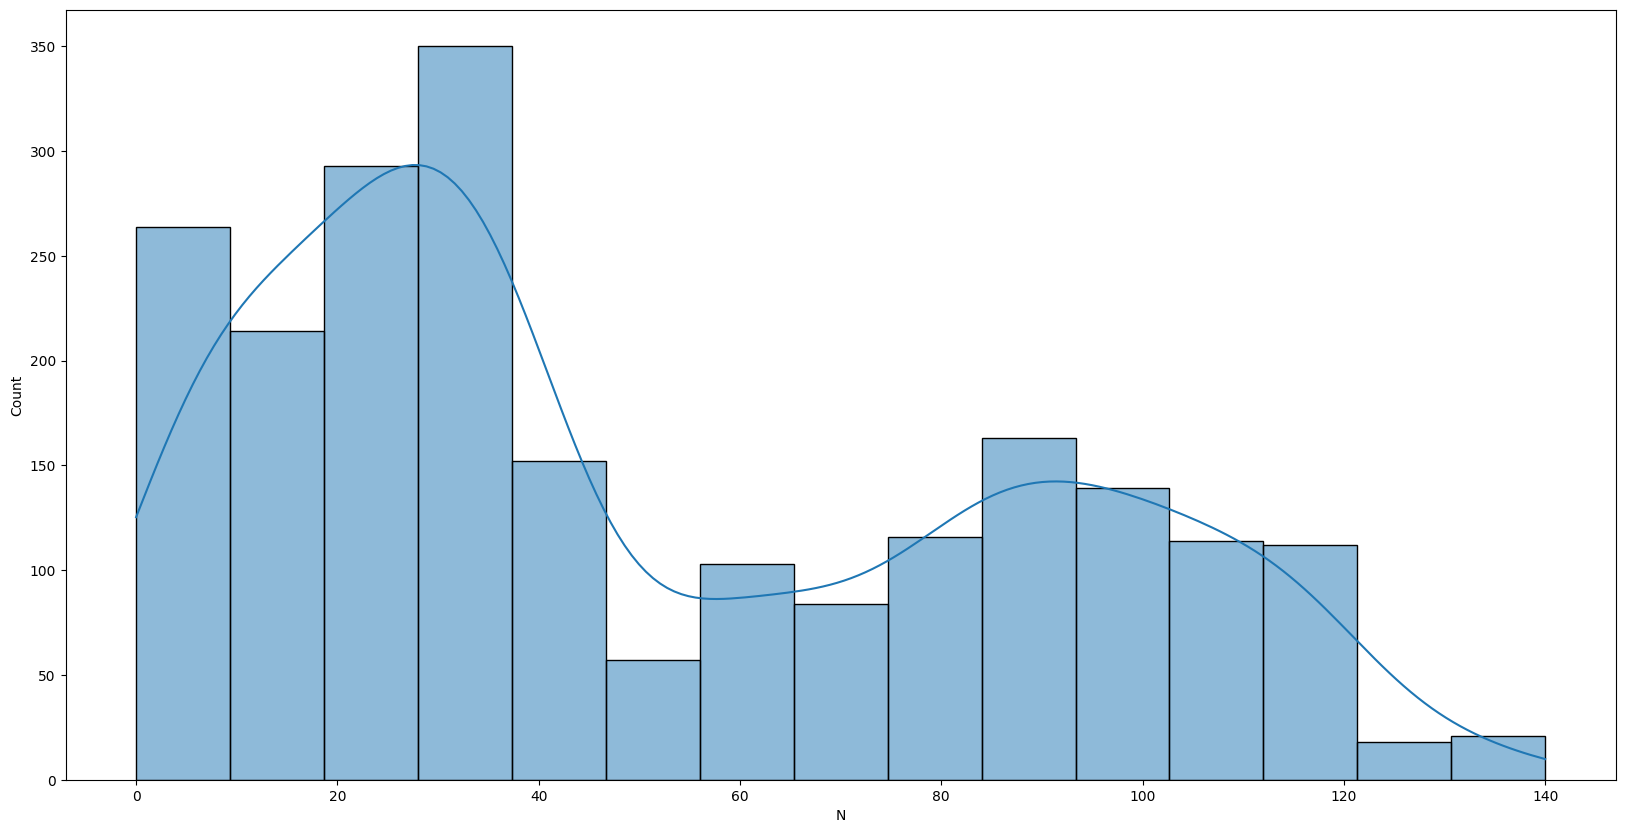

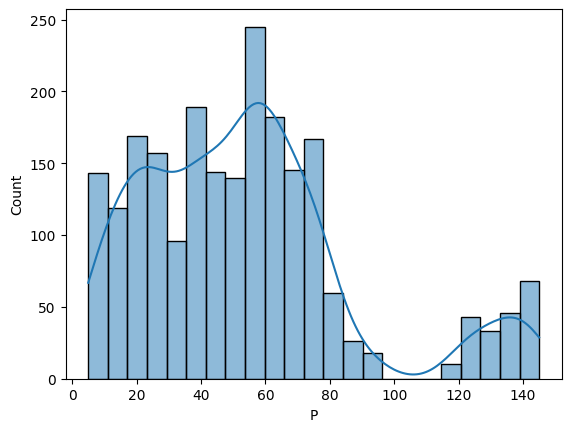

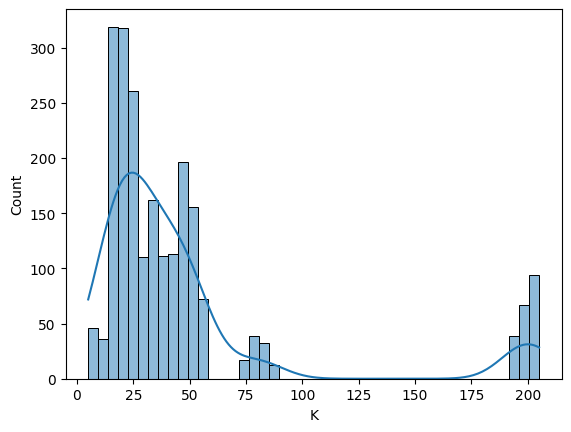

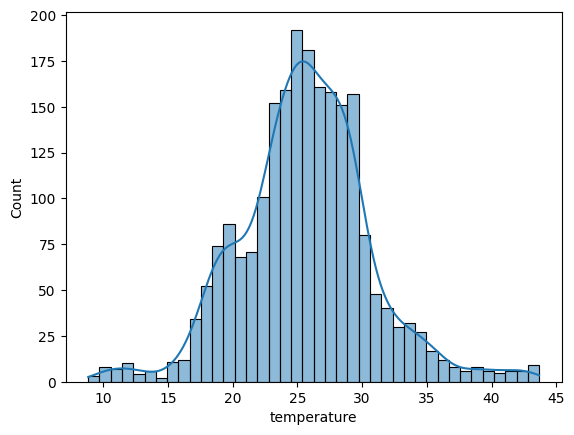

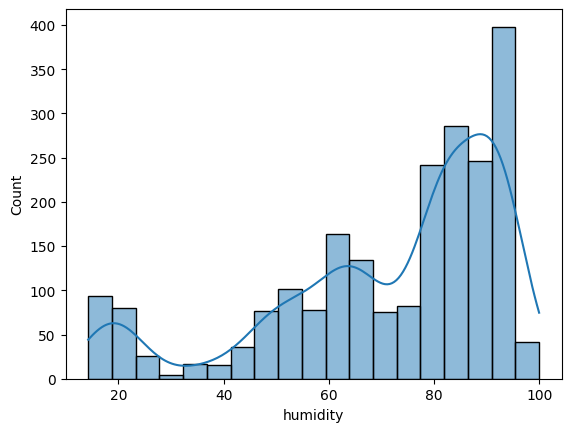

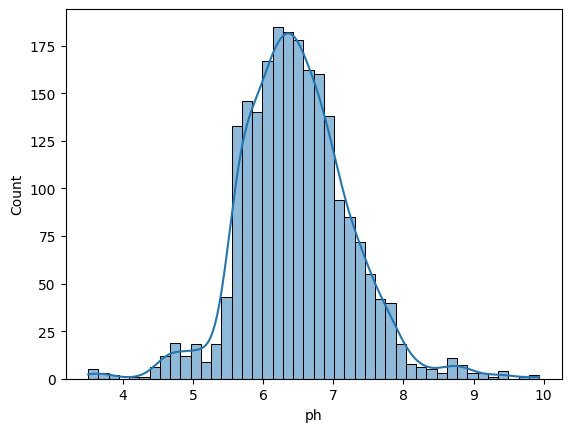

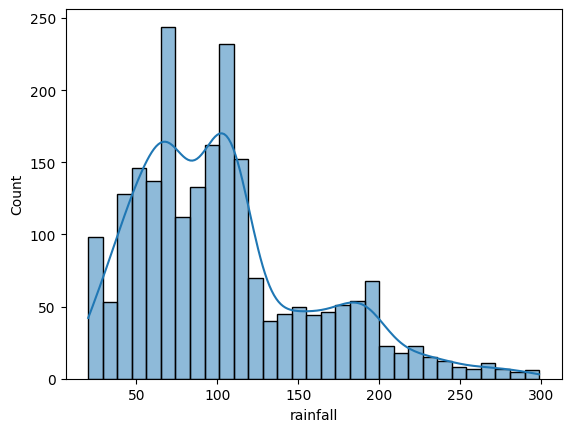

In [ ]:
plt.figure(figsize=(20, 10))
x = 0
for i in numerical_columns:
    sns.histplot(data = df, x = i, kde = True)
    plt.show()

<Axes: >

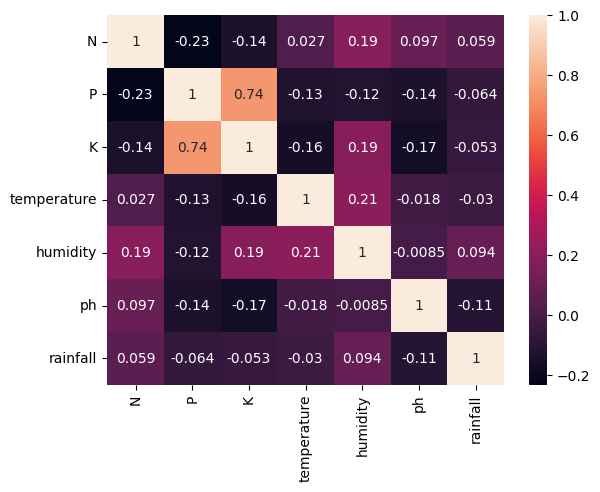

In [ ]:
sns.heatmap(df[numerical_columns].corr(), annot=True)

In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

# Model Training

In [ ]:
# Defining Target Variable 'y' -> ('label') and Feature Variables 'x'
x = df.drop(columns=['label'])
y = df['label']

In [ ]:
# Separating numerical columns and categorical columns
num_cols = x.select_dtypes(exclude=['object']).columns
cat_cols = x.select_dtypes(include=['object']).columns

In [ ]:
label_category = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
# Preprocessing Pipelines
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot_encoder', OneHotEncoder())
])

In [ ]:
preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols),
])

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [ ]:
x_train = pd.DataFrame(preprocessor.fit_transform(x_train), columns=preprocessor.get_feature_names_out())
x_test = pd.DataFrame(preprocessor.transform(x_test), columns=preprocessor.get_feature_names_out())

In [ ]:
x_train.head()

,num_pipeline__N,num_pipeline__P,num_pipeline__K,num_pipeline__temperature,num_pipeline__humidity,num_pipeline__ph,num_pipeline__rainfall
0,-0.444092,2.596459,2.903634,-0.768507,0.986005,-0.948734,0.205137
1,1.424666,-0.616148,-0.455415,0.306962,-0.706450,0.551413,0.649492
2,1.749668,-0.165782,-0.630164,-0.003551,0.566251,0.894138,-0.274157
3,1.153832,-0.375953,-0.610747,0.012014,-0.223531,-0.565468,0.027699
4,0.774664,-0.255855,-0.105919,0.031399,0.344560,0.887823,1.520406


In [ ]:
# Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Defining Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Gaussian Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [ ]:
# Lists to store scores
trained_model_list = []
model_list = []
accuracy_list = []

In [ ]:
# Function to evaluate any model (accuracy)
def evaluate_model_accuracy(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Train and evaluate each model
for model_name, model in models.items():
    trained_model = evaluate_model_accuracy(model, x_train, y_train, x_test, y_test)
    trained_model_list.append(trained_model)
    model_list.append(model_name)
    accuracy_list.append(trained_model)
    print(f'{model_name} trained.')
    print(f'Accuracy: {trained_model}')
    print('-'*50)
    print('\n')


Logistic Regression trained.
Accuracy: 0.9795454545454545
--------------------------------------------------


Gaussian Naive Bayes trained.
Accuracy: 1.0
--------------------------------------------------


Support Vector Machine trained.
Accuracy: 0.9863636363636363
--------------------------------------------------


K-Nearest Neighbors trained.
Accuracy: 0.975
--------------------------------------------------


Decision Tree trained.
Accuracy: 0.9818181818181818
--------------------------------------------------


Random Forest trained.
Accuracy: 1.0
--------------------------------------------------


Bagging trained.
Accuracy: 0.990909090909091
--------------------------------------------------


Gradient Boosting trained.
Accuracy: 0.9931818181818182
--------------------------------------------------




In [ ]:
# Random Forest and Naive Byes evaluates to 100% accuracy
# Fitting the Random Forest model on the training data

random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train, y_train)

# Saving the trained model to a file
import pickle
pickle_filename = 'model.pkl'
with open(pickle_filename, 'wb') as file:
    pickle.dump(random_forest_model, file)

print(f'Model saved to {pickle_filename}.')

Model saved to model.pkl.


In [ ]:
# Loading the model from pickle file
with open(pickle_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Making predictions using the loaded model
predictions = loaded_model.predict(x_test)
# print('Predictions: ', predictions)